# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [5]:
names=["姓名","國文","英文","數學","自然","社會"]
grades = pd.read_csv("D:/110summer/1_Python機器學習入門/Unit02/data/grades.csv",encoding='UTF-8',names=["姓名","國文","英文","數學","自然","社會"])

grades.head(5)

,姓名,國文,英文,數學,自然,社會
0,姓名,國文,英文,數學,自然,社會
1,劉俊安,9,10,15,10,13
2,胡玉華,10,10,10,8,9
3,黃淑婷,13,15,8,11,14
4,陳上紫,10,10,8,9,14


用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [6]:
grades["國文"]

0      國文
1       9
2      10
3      13
4      10
       ..
96      9
97      8
98     14
99     15
100     9
Name: 國文, Length: 101, dtype: object

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [7]:
Chinese_data=pd.DataFrame()
Chinese_data=grades["國文"][1:].astype(int)
print(Chinese_data)
#Reference : https://www.statology.org/pandas-typeerror-no-numeric-data-to-plot/

1       9
2      10
3      13
4      10
5      13
       ..
96      9
97      8
98     14
99     15
100     9
Name: 國文, Length: 100, dtype: int32


<AxesSubplot:>

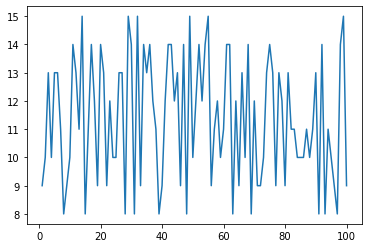

In [8]:
Chinese_data.plot(kind="line")

#### 資料畫出來

要畫個圖很容易。

國文
10    14
11    11
12    11
13    15
14    17
15     6
8     11
9     15
Name: 國文, dtype: int64


<AxesSubplot:xlabel='國文'>

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22283 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22283 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0, flags=flags)


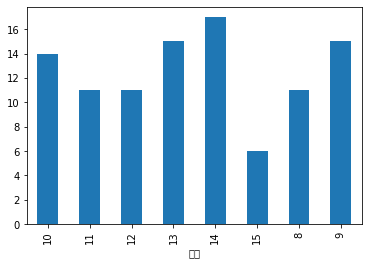

In [9]:
print(Chinese_data.groupby(grades["國文"]).count())
Chinese_data.groupby(grades["國文"]).count().plot(kind="bar")

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

## 3 一些基本的資料分析

算平均。

In [10]:
Chinese_data.mean()

11.39

In [11]:
Chinese_data.std()

2.1968526614594834

算標準差。

不如就該算的都幫我們算算...

In [12]:
grades["國文"].describe() #與下者差異在 header=0

count     101
unique      9
top        14
freq       17
Name: 國文, dtype: object

In [13]:
Chinese_data.describe()

count    100.000000
mean      11.390000
std        2.196853
min        8.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       15.000000
Name: 國文, dtype: float64

In [14]:
grades1 = pd.read_csv("D:/110summer/1_Python機器學習入門/Unit02/data/grades.csv",encoding='UTF-8',header=0,names=["姓名","國文","英文","數學","自然","社會"])
print(grades1)
grades1.describe()

     姓名  國文  英文  數學  自然  社會
0   劉俊安   9  10  15  10  13
1   胡玉華  10  10  10   8   9
2   黃淑婷  13  15   8  11  14
3   陳上紫  10  10   8   9  14
4   崔靜成  13  12  14  12  13
..  ...  ..  ..  ..  ..  ..
95  蔡佳燕   9  10   9  13  14
96  吳筱婷   8  10  14  10  15
97  陳家銘  14   9  11   8  12
98  李明威  15   9   8   9  15
99  農揚勇   9  11  12  12  10

[100 rows x 6 columns]


,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [15]:
grades1.corr(method ='kendall')
#https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

,國文,英文,數學,自然,社會
國文,1.000000,0.108544,-0.241225,-0.086615,-0.016426
英文,0.108544,1.000000,0.019266,0.087228,-0.048641
數學,-0.241225,0.019266,1.000000,0.007832,0.031380
自然,-0.086615,0.087228,0.007832,1.000000,-0.102339
社會,-0.016426,-0.048641,0.031380,-0.102339,1.000000


In [16]:
print(grades1["數學"])
print(grades1["社會"])

0     15
1     10
2      8
3      8
4     14
      ..
95     9
96    14
97    11
98     8
99    12
Name: 數學, Length: 100, dtype: int64
0     13
1      9
2     14
3     14
4     13
      ..
95    14
96    15
97    12
98    15
99    10
Name: 社會, Length: 100, dtype: int64


In [17]:
cor_math_soc=grades1["社會"].corr(grades1["數學"])
cor_math_soc
#https://blog.csdn.net/weixin_42300424/article/details/113502566?spm=1001.2101.3001.6650.1&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7Edefault-1-113502566-blog-112193828.pc_relevant_multi_platform_whitelistv1_exp2&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7Edefault-1-113502566-blog-112193828.pc_relevant_multi_platform_whitelistv1_exp2&utm_relevant_index=1

0.04165083562294915

只算兩科間的相關係數當然也可以。

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [18]:
grades1['總級分'] = grades1.sum(axis=1)
grades1
#https://sparkbyexamples.com/pandas/pandas-sum-dataframe-columns/

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55
96,吳筱婷,8,10,14,10,15,57
97,陳家銘,14,9,11,8,12,54
98,李明威,15,9,8,9,15,56


### 【技巧】

有計算的當然也可以的。

## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [19]:
grades1.sort_values('總級分',ascending=False)


,姓名,國文,英文,數學,自然,社會,總級分
80,施雅鈴,13,15,12,13,13,66
12,李正偉,11,15,11,14,15,66
54,陳怡潔,15,15,9,15,11,65
25,蔡亦瑄,13,13,14,13,12,65
57,胡淳茜,12,15,14,13,11,65
...,...,...,...,...,...,...,...
93,李曼夢,11,9,11,8,8,47
32,林建亨,9,11,8,8,11,47
1,胡玉華,10,10,10,8,9,47
7,林金鳳,8,9,10,10,8,45


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [20]:
#沒有加權，故以排序國文代替加權
#https://blog.csdn.net/weixin_45144170/article/details/106305532?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165814196516782388027849%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=165814196516782388027849&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-106305532-null-null.142^v32^new_blog_pos_by_title,185^v2^control&utm_term=python%20pandas%20sort&spm=1018.2226.3001.4187
grades1.sort_values(['總級分','國文'],ascending=False)

,姓名,國文,英文,數學,自然,社會,總級分
80,施雅鈴,13,15,12,13,13,66
12,李正偉,11,15,11,14,15,66
48,陳怡婷,15,14,12,9,15,65
54,陳怡潔,15,15,9,15,11,65
25,蔡亦瑄,13,13,14,13,12,65
...,...,...,...,...,...,...,...
93,李曼夢,11,9,11,8,8,47
1,胡玉華,10,10,10,8,9,47
32,林建亨,9,11,8,8,11,47
18,梁慧君,9,8,8,8,12,45


### 【重點】重設 index

In [21]:
grades1.sort_values(['總級分','國文'],ascending=False).reset_index()
#https://blog.csdn.net/claroja/article/details/72930594?ops_request_misc=&request_id=&biz_id=102&utm_term=pandas%20index&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-5-72930594.nonecase&spm=1018.2226.3001.4187

,index,姓名,國文,英文,數學,自然,社會,總級分
0,80,施雅鈴,13,15,12,13,13,66
1,12,李正偉,11,15,11,14,15,66
2,48,陳怡婷,15,14,12,9,15,65
3,54,陳怡潔,15,15,9,15,11,65
4,25,蔡亦瑄,13,13,14,13,12,65
...,...,...,...,...,...,...,...,...
95,93,李曼夢,11,9,11,8,8,47
96,1,胡玉華,10,10,10,8,9,47
97,32,林建亨,9,11,8,8,11,47
98,18,梁慧君,9,8,8,8,12,45


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [22]:
xueba15=grades1[grades1['數學']==15]
xueba15

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
24,陳竹伯,10,12,15,10,14,61
36,詹威德,12,13,15,10,14,64
37,曾怡君,11,12,15,13,14,65
39,段冠廷,9,8,15,12,15,59
59,芮秋辛,11,10,15,10,8,54
67,林哲法,14,9,15,10,14,62
70,葉儀依,9,13,15,8,14,59
73,吳志遠,13,15,15,8,8,59
76,周育霖,9,12,15,13,12,61


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [23]:
xueba30=grades1[(grades1['英文']==15) &(grades1['數學']==15)]
xueba30
#https://blog.csdn.net/yeshang_lady/article/details/89103572?ops_request_misc=&request_id=&biz_id=102&utm_term=pandas%20%E7%AD%9B%E9%80%89&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-8-89103572.nonecase&spm=1018.2226.3001.4187

,姓名,國文,英文,數學,自然,社會,總級分
73,吳志遠,13,15,15,8,8,59


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [24]:
grades2=grades1.drop(['總級分'], axis=1)
grades2
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [25]:
grades1.drop(['總級分'], axis=1,inplace=True)
grades1

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [26]:
grades1.drop([0,99],axis=0)

,姓名,國文,英文,數學,自然,社會
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
5,張雅岳,13,12,12,12,8
...,...,...,...,...,...,...
94,林與忠,10,9,10,11,15
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [27]:
grades1.drop([0,1,2,99])

,姓名,國文,英文,數學,自然,社會
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
5,張雅岳,13,12,12,12,8
6,梁俊翔,11,13,10,10,14
7,林金鳳,8,9,10,10,8
...,...,...,...,...,...,...
94,林與忠,10,9,10,11,15
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

In [28]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


### 【例子】 分析 Apple 股價

In [29]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')

In [30]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [31]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-20,37.935001,37.547501,37.875000,37.584999,68974800.0,35.580441
2017-07-21,37.610001,37.220001,37.497501,37.567501,105010400.0,35.563885
2017-07-24,38.110001,37.474998,37.645000,38.022499,85972800.0,35.994610
2017-07-25,38.459999,37.950001,37.950001,38.185001,75415600.0,36.148453
2017-07-26,38.482498,38.264999,38.337502,38.365002,63124000.0,36.318851
...,...,...,...,...,...,...
2022-07-13,146.449997,142.119995,142.990005,145.490005,71185600.0,145.490005
2022-07-14,148.949997,143.250000,144.080002,148.470001,78140700.0,148.470001
2022-07-15,150.860001,148.199997,149.779999,150.169998,76030800.0,150.169998


In [32]:
df_t300=df.tail(300)
df_t300

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-11,126.269997,122.769997,123.500000,125.910004,126142800.0,125.194733
2021-05-12,124.639999,122.250000,123.400002,122.769997,112172300.0,122.072571
2021-05-13,126.150002,124.260002,124.580002,124.970001,105861300.0,124.260078
2021-05-14,127.889999,125.849998,126.250000,127.449997,81918000.0,126.725983
2021-05-17,126.930000,125.169998,126.820000,126.269997,74244600.0,125.552681
...,...,...,...,...,...,...
2022-07-13,146.449997,142.119995,142.990005,145.490005,71185600.0,145.490005
2022-07-14,148.949997,143.250000,144.080002,148.470001,78140700.0,148.470001
2022-07-15,150.860001,148.199997,149.779999,150.169998,76030800.0,150.169998


#### 只要最後 300 個交易日!

#### 20 日的移動平均

In [33]:
df.Close.rolling(20).mean()

Date
2017-07-20           NaN
2017-07-21           NaN
2017-07-24           NaN
2017-07-25           NaN
2017-07-26           NaN
                 ...    
2022-07-13    139.451499
2022-07-14    140.237000
2022-07-15    140.974000
2022-07-18    141.824500
2022-07-19    142.796500
Name: Close, Length: 1258, dtype: float64

<AxesSubplot:xlabel='Date'>

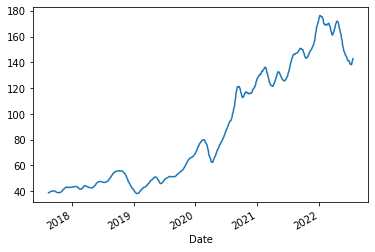

In [34]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

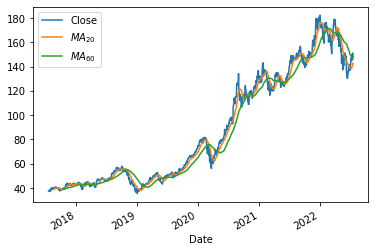

In [35]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [41]:
close= df_t300.Close.values
len(close)

300

In [42]:
x=close[:-1] #not involves the last value
len(x)

299

In [43]:
y=close[1:] #not involves the first value
len(y)

299

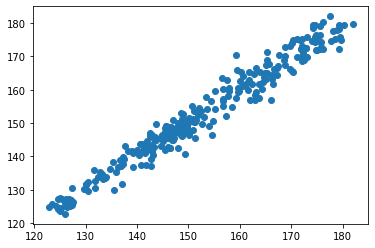

In [45]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [46]:
mydata = np.random.randn(4,3)

In [47]:
mydata

array([[-0.96743227,  1.92510853,  0.58120999],
       [ 1.01404966, -0.55967143, -0.02969389],
       [-1.87343506,  0.07794582,  0.94912407],
       [ 1.6898109 ,  1.0579527 ,  0.39199051]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [48]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [49]:
df2

,A,B,C
0,-0.967432,1.925109,0.581210
1,1.014050,-0.559671,-0.029694
2,-1.873435,0.077946,0.949124
3,1.689811,1.057953,0.391991


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [39]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [50]:
df3

,A,B,C
0,0.646591,-0.835176,-1.580578
1,0.355962,-1.135602,-1.769502
2,-0.713038,0.167367,3.299065


In [55]:
df4=pd.concat([df2,df3],axis=0) #上下結合

In [56]:
df4

,A,B,C
0,-0.967432,1.925109,0.581210
1,1.014050,-0.559671,-0.029694
2,-1.873435,0.077946,0.949124
3,1.689811,1.057953,0.391991
0,0.646591,-0.835176,-1.580578
1,0.355962,-1.135602,-1.769502
2,-0.713038,0.167367,3.299065


前面我們弄得亂七八糟的 index 重設一下。

In [62]:
df5=df4.reset_index().drop(["index"], axis=1)
df5

,A,B,C
0,-0.967432,1.925109,0.581210
1,1.014050,-0.559671,-0.029694
2,-1.873435,0.077946,0.949124
3,1.689811,1.057953,0.391991
4,0.646591,-0.835176,-1.580578
5,0.355962,-1.135602,-1.769502
6,-0.713038,0.167367,3.299065


#### 横向的貼

In [63]:
df6=pd.concat([df2,df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [64]:
df6

,A,B,C,A,B,C
0,-0.967432,1.925109,0.581210,0.646591,-0.835176,-1.580578
1,1.014050,-0.559671,-0.029694,0.355962,-1.135602,-1.769502
2,-1.873435,0.077946,0.949124,-0.713038,0.167367,3.299065
3,1.689811,1.057953,0.391991,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [98]:
df_names=pd.read_csv("D:/110summer/1_Python機器學習入門/Unit02/data/names.csv")

In [99]:
df_names

,羅雅慧
0,王紹尹
1,黃季坤
2,許正書
3,張鈞蓮
4,陳緯陽
...,...
94,陳君生
95,曾桂甫
96,林欣怡
97,林佳霖


In [100]:
df_grades = pd.DataFrame(np.random.randint(6,16,(99,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [101]:
df_grades

,國文,英文,數學,社會,自然
0,7,8,9,13,8
1,8,11,14,10,9
2,13,11,10,10,11
3,12,11,13,15,10
4,14,10,8,8,11
...,...,...,...,...,...
94,8,11,10,8,15
95,6,10,10,6,12
96,9,6,6,13,15
97,15,6,15,14,7


In [79]:
df_grades.to_csv("D:/110summer/1_Python機器學習入門/Unit02/data/gradesStudent.csv",index=0) #不把index存入

In [80]:
d7=pd.read_csv("D:/110summer/1_Python機器學習入門/Unit02/data/gradesStudent.csv")

In [81]:
d7

,國文,英文,數學,社會,自然
0,10,6,8,13,11
1,7,7,8,6,9
2,6,7,11,8,6
3,14,14,10,8,13
4,10,11,15,8,13
...,...,...,...,...,...
95,15,12,14,12,6
96,9,13,11,8,7
97,7,7,15,8,9
98,15,6,12,14,13


In [104]:
d8=pd.concat([df_names,df_grades],axis=1)

In [105]:
d8

,羅雅慧,國文,英文,數學,社會,自然
0,王紹尹,7,8,9,13,8
1,黃季坤,8,11,14,10,9
2,許正書,13,11,10,10,11
3,張鈞蓮,12,11,13,15,10
4,陳緯陽,14,10,8,8,11
...,...,...,...,...,...,...
94,陳君生,8,11,10,8,15
95,曾桂甫,6,10,10,6,12
96,林欣怡,9,6,6,13,15
97,林佳霖,15,6,15,14,7
